In [1]:
# import libraries
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [2]:
# parameters
samplesizes = np.arange(50,1001,step=50)
stdevs = np.linspace(.1,7,41)

# initialization
CIs = np.zeros((len(samplesizes),len(stdevs)))

# experiment
for ni,N in enumerate(samplesizes):
  for si,s in enumerate(stdevs):

    # SEM
    sem = s/np.sqrt(N)

    # CI
    CIs[ni,si] = 2*stats.t.interval(.95,N-1,loc=0,scale=sem)[1]

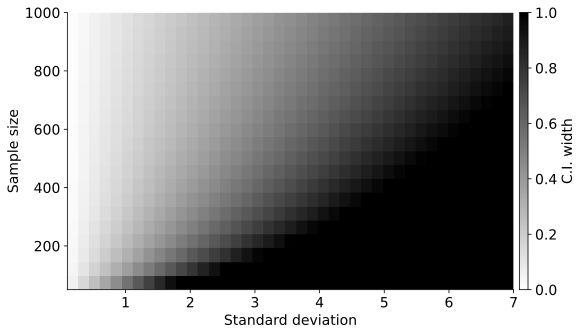

In [3]:
# plot 
fig,ax = plt.subplots(1,figsize=(8,5))
cax = ax.imshow(CIs,origin='lower',aspect='auto',vmin=0,vmax=1,cmap='gray_r',
          extent=[stdevs[0],stdevs[-1],samplesizes[0],samplesizes[-1]])
ax.set(xlabel='Standard deviation',ylabel='Sample size')

# colorbar
cbar_ax = fig.add_axes([.91,.11,.015,.77])
cbar = plt.colorbar(cax,cax=cbar_ax,label='C.I. width')

# display the figure
plt.show()

# Exe 2

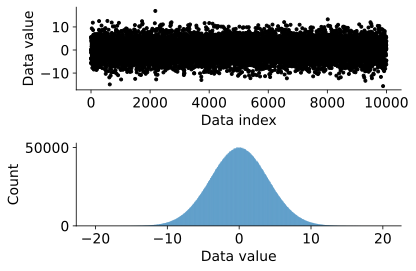

In [4]:
# simulate data

popN = int(1e7) 

# the data
population = (4*np.random.randn(popN))**1 

# we can calculate the exact population mean
popMean = np.mean(population)

# plot
fig,ax = plt.subplots(2,1,figsize=(6,4))

# plotting only every 1000th sample
ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')

# display the figure
plt.tight_layout()
plt.show()

In [5]:
# draw a random sample

# parameters
samplesize = 500
confidence =  95 # in percent

# compute sample mean
dataSample = np.random.choice(population,samplesize)
samplemean = np.mean(dataSample)
samplestd  = np.std(dataSample,ddof=1)

# compute confidence intervals
confint = stats.t.interval(confidence/100,samplesize-1,
                           loc=samplemean,scale=samplestd/np.sqrt(samplesize))

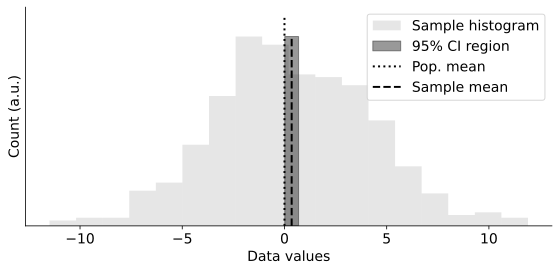

In [6]:
# plot
fig,ax = plt.subplots(1,figsize=(8,4))

# the histogram
h = ax.hist(dataSample,bins='fd',color='k',alpha=.1,label='Sample histogram')
ytop = np.max(h[0]) # variable for histogram peak value

# confidence interval area
ax.fill_between([confint[0],confint[1]],[0,0],[ytop,ytop],color='k',alpha=.4,label=f'{confidence}% CI region')

# add the linesindicating population means
ax.plot([popMean,popMean],[0,ytop*1.1],'k:',linewidth=2,label='Pop. mean')
ax.plot([samplemean,samplemean],[0,ytop],'k--',linewidth=2,label='Sample mean')

# adjust the plot
ax.legend()
ax.set(yticks=[],xlabel='Data values',ylabel='Count (a.u.)')

# display the figure
plt.tight_layout()
plt.show()

# Exe 3

In [7]:
# parameters
numExperiments = 5000
samplesize = 500

# initialize the matrix of whether the population mean is inside the CI
withinCI = np.zeros(numExperiments)


# run the experiment
for expi in range(numExperiments):

  # compute sample mean and CI
  dataSample = np.random.choice(population,samplesize)
  samplemean = np.mean(dataSample)
  samplestd  = np.std(dataSample,ddof=1)
  confint    = stats.t.interval(confidence/100,samplesize-1,
                           loc=samplemean,scale=samplestd/np.sqrt(samplesize))

  # determine whether the true mean is inside this CI
  if popMean>confint[0] and popMean<confint[1]:
    withinCI[expi] = 1


print('%g%% of sample C.I.''s contained the true population mean.'%(100*np.mean(withinCI)))

95.64% of sample C.I.s contained the true population mean.


# Exe 6

In [8]:
# parameters
samplesize = 500
numBoots   = 1000

# random sample from the population
dataSample = np.random.choice(population,samplesize)

# need these statistics
samplemean = np.mean(dataSample)
samplestd  = np.std(dataSample,ddof=1)


# initialize a vector to store the bootstrapped means
bootmeans = np.zeros(numBoots)

# bootstrapping
for booti in range(numBoots):

  # create a bootstrap sample
  bootsample = np.random.choice(dataSample,samplesize)

  # compute its mean
  bootmeans[booti] = np.mean(bootsample)


# find confidence intervals (hard-coded to 95%)
confintB = np.percentile(bootmeans,[2.5,97.5]) 
confintB

array([-0.22190423,  0.48658494])

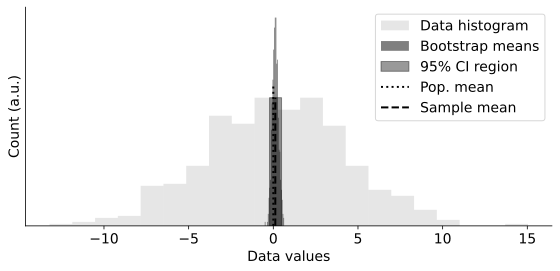

In [9]:
# plot
fig,ax = plt.subplots(1,figsize=(8,4))

# the histogram
h = ax.hist(dataSample,bins='fd',color='k',alpha=.1,label='Data histogram')
ax.hist(bootmeans,bins='fd',color='k',alpha=.5,label='Bootstrap means')
ytop = np.max(h[0]) # convenient variable for histogram peak value

# confidence interval area
ax.fill_between([confintB[0],confintB[1]],[0,0],[ytop,ytop],color='k',alpha=.4,label=f'{confidence}% CI region')

# lines indicating population means
ax.plot([popMean,popMean],[0,ytop*1.1],'k:',linewidth=2,label='Pop. mean')
ax.plot([samplemean,samplemean],[0,ytop],'k--',linewidth=2,label='Sample mean')

ax.legend()
ax.set(yticks=[],xlabel='Data values',ylabel='Count (a.u.)')

# display the figure
plt.tight_layout()
plt.show()

In [10]:
# compare against the analytic confidence interval

# compute confidence intervals (hard-coding to 95%)
confintA = stats.t.interval(.975,samplesize-1,
                           loc=samplemean,scale=samplestd/np.sqrt(samplesize))

print(f'Empirical CI(95%) = ({confintB[0]:.3f},{confintB[1]:.3f})')
print(f'Analytic  CI(95%) = ({confintA[0]:.3f},{confintA[1]:.3f})')

Empirical CI(95%) = (-0.222,0.487)
Analytic  CI(95%) = (-0.299,0.536)


# Exe 7

In [11]:
# simulation params
samplesize = 100
trueR = .3 # true population correlation

# data
X = np.random.randn(samplesize,2)
X[:,1] = X[:,0]*trueR + X[:,1]*np.sqrt(1-trueR**2)

# confirmation
np.corrcoef(X.T)

array([[1.        , 0.29816456],
       [0.29816456, 1.        ]])

In [12]:
# function (hard-coded to 95% confidence level)
def corr_CI(X,nBoots=1000):

  # initialize bootstrap sample-mean differences
  bootstrap_r = np.zeros(nBoots)

  # empirical sample size
  samplesize = X.shape[0]

  # generate bootstrap samples and correlate
  for i in range(nBoots):
    boot_idx = np.random.choice(range(samplesize), size=samplesize)
    bootstrap_r[i] = np.corrcoef(X[boot_idx,:].T)[0,1]


  # Compute the percentiles for the bootstrapped coefficients distribution
  return np.percentile(bootstrap_r,[2.5,97.5]),bootstrap_r

In [13]:
# observed correlation coefficient (using scipy)
obs_r,obs_p = stats.pearsonr(X[:,0],X[:,1])

# get empirical confidence intervals (using default of 1000 bootstraps)
CI,bootstrap_r = corr_CI(X)


# choose a color for the CI area based on significance
areacolor = 'gray' if np.sign(CI[0])==np.sign(CI[1]) else 'red'

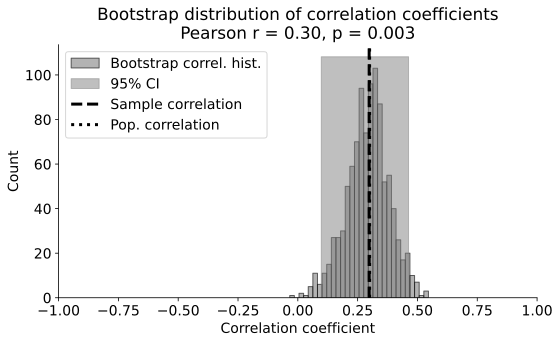

In [14]:
# plot
plt.figure(figsize=(8,5))

# histogram of the bootstrapped coefficients
plt.hist(bootstrap_r, bins=30, edgecolor='k', color='gray', alpha=.6,label='Bootstrap correl. hist.')

# area for confidence interval 
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], CI[0], CI[1], color=areacolor, alpha=.5, label='95% CI')

# lines indicating coefficients
plt.axvline(obs_r,color='k',linestyle='--',linewidth=3, label='Sample correlation')
plt.axvline(trueR,color='k',linestyle=':',linewidth=3, label='Pop. correlation')

plt.legend()
plt.xlim([-1,1])
plt.xlabel('Correlation coefficient')
plt.ylabel('Count')
plt.title(f'Bootstrap distribution of correlation coefficients\nPearson r = {obs_r:.2f}, p = {obs_p:.3f}',loc='center')

# display the figure
plt.tight_layout()
plt.show()

# Exe 8

In [15]:
# simulation params
samplesizes = np.arange(10,3011,step=100)

# matrix to store the sample sizes
bootCI = np.zeros((len(samplesizes),2))
obs_r = np.zeros(len(samplesizes))

# reduce the number of bootstraps
nBoots = 500 

# run the experiment
for idx,N in enumerate(samplesizes):

  # generate the data
  X = np.random.randn(N,2)
  X[:,1] = X[:,0]*trueR + X[:,1]*np.sqrt(1-trueR**2)

  # observed correlation coefficient
  obs_r[idx] = np.corrcoef(X.T)[0,1]

  # get confidence intervals
  bootCI[idx,:] = corr_CI(X,nBoots)[0]

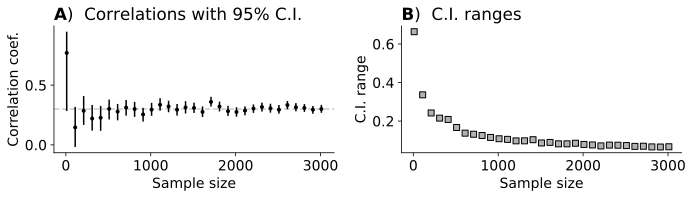

In [16]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,3))

axs[0].errorbar(samplesizes, obs_r, yerr=[obs_r-bootCI[:,0],bootCI[:,1]-obs_r],
                marker='.',color='k',linestyle='None')
axs[0].axhline(y=trueR,color=(.8,.8,.8),linestyle='--',zorder=-10)
axs[0].set(xlabel='Sample size',ylabel='Correlation coef.')
axs[0].set_title(r'$\bf{A}$)  Correlations with 95% C.I.')

axs[1].plot(samplesizes,np.diff(bootCI,axis=1),'ks',markerfacecolor=(.7,.7,.7))
axs[1].set(xlabel='Sample size',ylabel='C.I. range')
axs[1].set_title(r'$\bf{B}$)  C.I. ranges')

# display the figure
plt.tight_layout()
plt.show()

# Exe 9

In [17]:
# simulation params
samplesize = 50

# range of correlations
coefs = np.linspace(0,.99,42)

# matrix to store the sample sizes
bootCI = np.zeros((len(coefs),2))
obs_r = np.zeros(len(coefs))


# run the experiment
for idx,r in enumerate(coefs):

  # generate the data
  X = np.random.randn(samplesize,2)
  X[:,1] = X[:,0]*r + X[:,1]*np.sqrt(1-r**2)

  # observed correlation coefficient
  obs_r[idx] = np.corrcoef(X.T)[0,1]

  # confidence intervals
  bootCI[idx,:] = corr_CI(X,nBoots)[0]

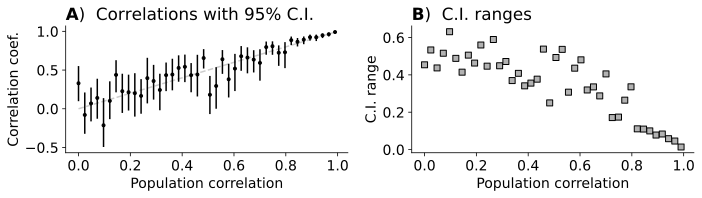

In [18]:
# the plot
_,axs = plt.subplots(1,2,figsize=(10,3))
axs[0].errorbar(coefs, obs_r, yerr=[obs_r-bootCI[:,0],bootCI[:,1]-obs_r],
                marker='.',color='k',linestyle='None')
axs[0].plot(coefs,coefs,color=(.8,.8,.8),linestyle='--',zorder=-10)
axs[0].set(xlabel='Population correlation',ylabel='Correlation coef.')
axs[0].set_title(r'$\bf{A}$)  Correlations with 95% C.I.')

axs[1].plot(coefs,np.diff(bootCI,axis=1),'ks',markerfacecolor=(.7,.7,.7))
axs[1].set(xlabel='Population correlation',ylabel='C.I. range')
axs[1].set_title(r'$\bf{B}$)  C.I. ranges')

# display the figure
plt.tight_layout()
plt.show()

# Exe 10

In [19]:
# simulation parameters
means = np.linspace(0,2.5,41)
stds = np.linspace(.5,5,51)
sampsize = 30

# initialize output matrix
statsmatrix = np.zeros((len(means),len(stds)))


# run the experiment
for mi in range(len(means)):
  for si in range(len(stds)):

    # SEM
    sem = stds[si]/np.sqrt(sampsize)

    # confidence interval
    CI = stats.t.interval(.95,sampsize-1,loc=means[mi],scale=sem)

    # t/p values
    tval = means[mi] / sem
    pval = 2*stats.t.sf(tval,sampsize-1)

    # build up the stats matrix according to significances
    statsmatrix[mi,si] += int(CI[0]>0) # only positive means, so need only test if the lower bound is negative
    statsmatrix[mi,si] += int(pval<.05)

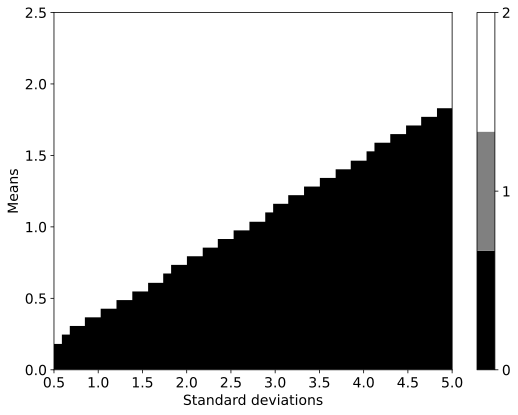

In [20]:
# colormap
import matplotlib.colors as colors
cmap = plt.get_cmap('gray',3)

plt.figure(figsize=(8,6))
plt.imshow(statsmatrix,vmin=0,vmax=2,cmap=cmap,origin='lower',aspect='auto',
           extent=[stds[0],stds[-1],means[0],means[-1]])

plt.xlabel('Standard deviations')
plt.ylabel('Means')
plt.gca().spines[['right','top']].set_visible(True)
plt.colorbar(ticks=[0,1,2])

# display the figure
plt.tight_layout()
plt.show()

In [21]:
# Confirm that no pixels are 1
np.unique(statsmatrix)



array([0., 2.])

# Exe 11

In [22]:
# generate the data
sampsize = 30

sample1 = np.random.randn(sampsize)
sample2 = np.random.randn(sampsize)**2
sample2 = sample2-np.mean(sample2) + .5 # mean-center then mean-shift

# compute the ttest
tres = stats.ttest_ind(sample1,sample2)

In [23]:
# CI parameters
nBoots = 1000 

# observed difference in means
obs_diff = np.mean(sample1) - np.mean(sample2)

# initialize bootstrap sample-mean differences
bootstrap_diffs = np.zeros(nBoots)

# Generate bootstrap samples.
for i in range(nBoots):
  boot_sample1 = np.random.choice(sample1, size=sampsize)
  boot_sample2 = np.random.choice(sample2, size=sampsize)
  bootstrap_diffs[i] = np.mean(boot_sample1) - np.mean(boot_sample2)

# empirical confidence intervals (hard-coded to 95%)
CI_B = np.percentile(bootstrap_diffs,[2.5,97.5])

# choose a color for the CI area based on significance
areacolor = 'gray' if np.sign(CI_B[0])==np.sign(CI_B[1]) else 'red'

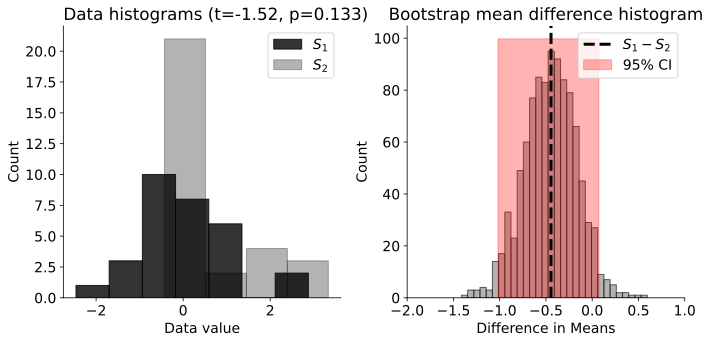

In [24]:
# plotting
_,axs = plt.subplots(1,2,figsize=(10,5))

# data distributions
axs[0].hist(sample1, bins='fd', color='k', edgecolor='k', alpha=.8, label=r'$S_1$')
axs[0].hist(sample2, bins='fd', color='k', edgecolor='k', alpha=.3, label=r'$S_2$')
axs[0].set(xlabel='Data value',ylabel='Count')
axs[0].legend()
axs[0].set_title(f'Data histograms (t={tres.statistic:.02f}, p={tres.pvalue:.03f})')

# bootstrapping distribution
axs[1].hist(bootstrap_diffs, bins=30, edgecolor='k',color='gray', alpha=.6)
axs[1].axvline(obs_diff,color='k',linestyle='--',linewidth=3, label=r'$S_1-S_2$')
axs[1].fill_betweenx([0, plt.gca().get_ylim()[1]], CI_B[0], CI_B[1], color=areacolor, alpha=.3, label='95% CI')
axs[1].legend()
axs[1].set(xlim=[-2,1],xlabel='Difference in Means',ylabel='Count')
axs[1].set_title(f'Bootstrap mean difference histogram',loc='center')

# display the figure
plt.tight_layout()
plt.show()

# Exe 12

In [2]:
# colored marble counts
blue   = 40
yellow = 30
orange = 20
totalMarbs = blue + yellow + orange

# put them all in a jar
jar = np.hstack((1*np.ones(blue),2*np.ones(yellow),3*np.ones(orange)))

# draw a sample of 500 marbles (with replacement)
numDraws = 500
marbSample = np.random.choice(jar,size=numDraws)

In [3]:
# bootstrapping for empirical confidence intervals
nBoots = 1000
bootProps = np.zeros((3,nBoots))
for i in range(nBoots):

  # bootstrap sample
  bootmarbs = np.random.choice(marbSample,size=numDraws)

  # empirical proportions of this sample
  for j in range(1,4):
    bootProps[j-1,i] = sum(bootmarbs==j)/numDraws

In [4]:
# confidence intervals
CI = np.array([ np.percentile(bootProps[0,:],[2.5,97.5]),
                np.percentile(bootProps[1,:],[2.5,97.5]),
                np.percentile(bootProps[2,:],[2.5,97.5]) ])

In [5]:
# empirical proportions of colors drawn
props = np.array([ sum(marbSample==1) / numDraws,
                   sum(marbSample==2) / numDraws,
                   sum(marbSample==3) / numDraws ] )

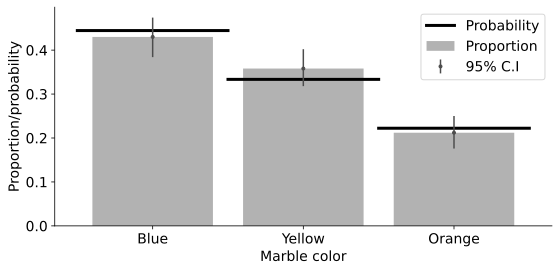

In [6]:
# plot (against the theoretical probability)
plt.figure(figsize=(8,4))
plt.bar([1,2,3],props,label='Proportion',color=(.7,.7,.7))
plt.plot([0.5, 1.5],[blue/totalMarbs, blue/totalMarbs],'k',linewidth=3,label='Probability')
plt.plot([1.5, 2.5],[yellow/totalMarbs,yellow/totalMarbs],'k',linewidth=3)
plt.plot([2.5, 3.5],[orange/totalMarbs,orange/totalMarbs],'k',linewidth=3)


plt.errorbar([1,2,3],props,yerr=[props-CI[:,0],CI[:,1]-props],
                marker='.',color=(.3,.3,.3),linestyle='None',label='95% C.I')

plt.xticks([1,2,3],labels=('Blue','Yellow','Orange'))
plt.xlabel('Marble color')
plt.ylabel('Proportion/probability')
plt.legend()

# display the figure
plt.tight_layout()
plt.show()